## Post Surgery Lung Cancer Survival

<a id = Section1></a>

---
# **1. Introduction**
---
**<h3>Lung Cancer:</h3>**

- It refers to an **uncontrolled growth** of **abnormal cells** in **one or both lungs**, **usually** in the **cells lining air passages**. 

- These **abnormal cells do not grow into healthy lung tissue**, **but divide rapidly** to **form tumours** that **interfere** with **lung function**.

**<h3>Treatment(Thoracic Surgery):</h3>**

- This surgery **refers** to an **operation on organs in the chest, including the heart, lungs and esophagus**.

- **Examples** of thoracic surgery include **coronary artery bypass surgery, heart transplant, lung transplant** and **removal of parts of the lung affected by cancer**.

- Thoracic surgery, **also known as chest surgery**, may be **used to diagnose or repair lungs affected by cancer, trauma or pulmonary disease**. 

- Thoracic **surgery** procedures may be **performed with either minimally invasive techniques** or an **open surgical procedure** called a **thoracotomy**.

- **Surgeon** may **opt** for a **thoracotomy when it is necessary** to see large portions of the lung or inner chest cavity. The procedure may be **performed to remove the entire lung or a portion of the lung**.



**<h3>Symptoms:</h3>**

- It includes a **cough** (often with blood), **chest pain**, **wheezing and weight loss**.

- It **requries** a **medical diagnosis** and **symptoms often don't appear until the cancer is advanced**.

**<h3>Quick Facts:</h3>**

- According to <a href = "https://www.who.int/news-room/fact-sheets/detail/cancer">**World Health Orgainization (WHO)**</a>, **cancer** is the **second leading cause of death globally**, and is responsible for an **estimated 9.6 million deaths in 2018**. Globally, about 1 in 6 deaths is due to cancer.

- According to <a href = "https://www.wcrf.org/dietandcancer/cancer-trends/lung-cancer-statistics">**World Cancer Researh Fund**</a>, an American Institute For Cancer Research, **Lung Cancer** is the **most commonly occurring cancer** in men and the third most commonly occurring cancer in women. **There were 2 million new cases in 2018**.

- To know more about facts related to cancer, click on the links that are available above.

<a id = Section2></a>

---
# **2. Problem Statement**
---

- As we already know, **in some scenarios(rare)**, it is **not entirely possible** for **patients** to **survive even after surgery**. There may be **several factors related** to the patients, **example, their health history**.

- These **patients requires intensive care** even on **post operation** and **sometimes** it is **entirely upto the luck of the patients** that they will get cured completely or not.

- Our **problem here is to classify the life expectancy of patients on post operation of lung cancer**.

<center><img src = "https://albertahealthservices.ca/img-post-surgery-eating.jpg"></center>

**<h3>Scenario:</h3>**

- **Grand Oak**, is an **american hospital specialized** in **identification and treatment** of **cancer related diseases**.

- **Over time** hospital has **accumulated data** of patients, and **experts have provided pattern over accumulated data** to **ensure** that **patient will survive if certain criteria met**.

- There are **5 teams** of **experts** who can **perform approx 300 operations per day in total**, **after receiving** the **health reports** of patients.

- These **teams have experience** of **patient's survial after post operation** **reason being** their **knowledge over past years of study and operations** they have performed.

- As they perform **more operations** their **knowledge may get refined** over time but **pace in improving refinement is slow**.

- **If** somehow we could **use** their **knowledge into machines**, it can **provide very precise results**.

- So they **hired** a **team of data scientists** to **find pattern** out of the data which could **help in identification** of **survial of patients** **based on accumulated knowledge by expertise**.

| Target Feature | Potential Values |
| :-- | :-- |
| Risk(1yr) | False: Patient won't die |
| | True: Patient dies |

<a id = Section3></a>

---
# **3. Installing & Importing Libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report
!pip install -q yellowbrick                   # Toolbox for Measuring Machine Performance
!pip install -q imbalanced-learn              # Toolbox for imbalanced dataset

     |████████████████████████████████| 1.6 MB 35.2 MB/s 


<a id = Section32></a>
### **3.2 Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

     |████████████████████████████████| 315 kB 33.5 MB/s 
     |████████████████████████████████| 102 kB 12.7 MB/s 
     |████████████████████████████████| 690 kB 65.8 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 9.9 MB 57.8 MB/s 
     |████████████████████████████████| 4.7 MB 2.9 MB/s 
     |████████████████████████████████| 296 kB 73.4 MB/s 


<a id = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
import pandas.util.testing as tm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np

# For Random seed values
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances
from yellowbrick.model_selection import FeatureImportances

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To Disable Warnings
import warnings
warnings.filterwarnings(action = 'ignore')

<a id=Section4></a>

---
# **4. Data Acquisition & Description**
---

This data set is based on Post Thoracic Surgery provided by Grand Oak and is accessible <a href="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Healthcare/Post%20Thoracic%20Surgery/ThoraricSurgery.csv">**here**</a>.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 500 | 17 | 44.8 KB|

|#|Features|Description|
| :-- | :-- | :-- |
|01|**DiagnosisCode**|Diagnosis specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any [DGN1,DGN2,DGN3,DGN4,DGN5,DGN6,DGN8]|
|||Diagnosis Codes are the medical codes used to classify two diagnoses, a diagnosis with an associated secondary process (manifestation) or a diagnosis with an associated complication|
|02|**ForcedVitalCapacity**|Maximum amount of air a person can expel from the lungs after a maximum inhalation in litres. [Range: (1.44, 6.3)]|
|03|**ForcedExpirationVolume**|Volume that has been exhaled at the end of the first second of forced expiration in litres. [Range: (0.96, 86.3)]|
|04|**ZubrodPerformanceStatus**|A performance status in Zubrod scale [PRZ0 : (fully active, unrestricted by disease), PRZ1 : (able to carry out light work),|
||| PRZ2 : (ambulatory but resting for as much as 50% of the day)]|
|05|**PainBeforeSurgery**|If patient has any pain before surgery. Values: [False, True]|
|06|**HaemoptysisBeforeSurgery**|If patient has any Haemoptysis(cough with blood) before surgery. Values: [False, True]|
|07|**DyspnoeaBeforeSurgery**|If patient has any Dyspnoea (difficult in breathing) before surgery. Values: [False, True]|
|08|**CoughBeforeSurgery**|If patient has any cough before surgery. Values: [False, True]|
|09|**WeaknessBeforeSurgery**|If patient has any weakness before surgery. Values: [False, True]|
|10|**OriginalTumourSize**|Size of the original tumour, from OC11 (smallest) to OC14 (largest) [OC11,OC14,OC12,OC13]|
|11|**Type2Diabetes**|If patient has any type 2 diabetes before surgery. Values: [False, True]|
|12|**MIUpto6**|If patient has any myocardial infarction (MI) or heart attack before surgery. Values: [False, True]|
|13|**PeripheralArterialDiseases**|If patient has any Peripheral Arterial Diseases before surgery. Values: [False, True]|
|14|**Smoking**|If patient has any smoking habits before surgery. Values: [False, True]|
|15|**Asthma**|If patient has any asthma before surgery. Values: [False, True]|
|16|**AgeAtSurgery**|The current age at which patients is having surgery.|
|17|**Risk(1yr)**|If patient will survive within a year or not. Values: [False, True]|

In [ ]:
LINK = 'https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Healthcare/Post%20Thoracic%20Surgery/ThoraricSurgery.csv'

def load_thoracic_data(link = LINK):
  return pd.read_csv(filepath_or_buffer = link)

In [ ]:
data = load_thoracic_data()
print('Data Shape:', data.shape)
data.head()

Data Shape: (500, 17)


,DiagnosisCode,ForcedVitalCapacity,ForcedExpirationVolume,ZubrodPerformanceStatus,PainBeforeSurgery,HaemoptysisBeforeSurgery,DyspnoeaBeforeSurgery,CoughBeforeSurgery,WeaknessBeforeSurgery,OriginalTumourSize,Type2Diabetes,MIUpto6,PeripheralArterialDiseases,Smoking,Asthma,AgeAtSurgery,Risk(1yr)
0,DGN2,2.88,2.16,PRZ1,NaN,False,False,True,True,OC14,False,False,False,True,False,60,False
1,DGN3,3.40,1.88,PRZ0,NaN,False,False,False,False,OC12,False,False,False,True,False,51,False
2,DGN3,2.76,2.08,PRZ1,NaN,False,False,True,False,OC11,False,False,False,True,False,59,False
3,DGN3,3.68,3.04,PRZ0,NaN,False,False,False,False,OC11,False,False,False,False,False,54,False
4,DGN3,2.44,0.96,PRZ2,NaN,True,False,NaN,True,OC11,False,False,False,True,False,73,True


<a id = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
print('Described Column Length:', len(data.describe().columns))
data.describe()

Described Column Length: 3


,ForcedVitalCapacity,ForcedExpirationVolume,AgeAtSurgery
count,500.000000,500.000000,500.000000
mean,3.290840,4.455920,62.534000
std,0.868247,11.418564,8.704964
min,1.440000,0.960000,21.000000
25%,2.600000,2.000000,57.000000
50%,3.185000,2.440000,62.000000
75%,3.840000,3.080000,69.000000
max,6.300000,86.300000,87.000000


**Observation:**

- The **average forced vital capacity** of **patients** is **3.2**.
- The **average forced expiration volume** of **patients** is **4.4**.
- The **average age of patients** is **62**.
- **Forced vital capacity** of **25% patients** is **atmost 2.6** while for **50% and 75% of patients** its **atmost 3.18 and 3.84**.
- **Forced expiration volume** of **25% patients** is **atmost 2** while for **50% and 75% of patients** its **atmost 2.44 and 3.08**.
- **Age** of **25% patients** is **atmost 57** while for **50% and 75% of patients** its **atmost 62 and 69**.

<a id = Section44></a>
### **4.4 Pre Profiling Report**

- For quick analysis pandas profiling is very handy.
- Generates profile reports from a pandas DataFrame.
- For each column statistics are presented in an interactive HTML report.

In [ ]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [ ]:
from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- Report shows that **there are 17 features** out of which, **11 are boolean, 3 are numerical and 3 are categorical**.
- There are **0.1% missing cells** available.
- Contains **6% of duplicacy** in records.
- For detailed information, checkout the full report.

<a id = Section5></a>

---
# **5. Data Pre-Processing**
---

<a id = Section51></a>
### **5.1 Identification & Handling of Missing Data**

#### **5.1.1 Null Data Identification & Handling**

**Before Handling Null Data**

In [ ]:
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequency'] = data.isnull().sum().values
percent = data.isnull().sum().values/data.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,DiagnosisCode,ForcedVitalCapacity,ForcedExpirationVolume,ZubrodPerformanceStatus,PainBeforeSurgery,HaemoptysisBeforeSurgery,DyspnoeaBeforeSurgery,CoughBeforeSurgery,WeaknessBeforeSurgery,OriginalTumourSize,Type2Diabetes,MIUpto6,PeripheralArterialDiseases,Smoking,Asthma,AgeAtSurgery,Risk(1yr)
Null Frequency,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**

- **Feature**:
  - Problem &rarr; Action Required
- **PainBeforeSurgery:**
  - Missing Information &rarr; Drop
- **CoughBeforeSurgery:**
  - Missing Information &rarr; Drop

**Performing Operations**

In [ ]:
data.dropna(inplace=True)

**After Handling Null Data**

In [ ]:
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequency'] = data.isnull().sum().values
percent = data.isnull().sum().values/data.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,DiagnosisCode,ForcedVitalCapacity,ForcedExpirationVolume,ZubrodPerformanceStatus,PainBeforeSurgery,HaemoptysisBeforeSurgery,DyspnoeaBeforeSurgery,CoughBeforeSurgery,WeaknessBeforeSurgery,OriginalTumourSize,Type2Diabetes,MIUpto6,PeripheralArterialDiseases,Smoking,Asthma,AgeAtSurgery,Risk(1yr)
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**

- We have **successfully removed null information**.

#### **5.1.2 Zero Data Identification & Handling**

In [ ]:
zero_frame = pd.DataFrame(index = data.columns.values)
zero_frame['Null Frequency'] = data[data == 0].count().values
percent = data[data == 0].count().values / data.shape[0]
zero_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
zero_frame.transpose()

,DiagnosisCode,ForcedVitalCapacity,ForcedExpirationVolume,ZubrodPerformanceStatus,PainBeforeSurgery,HaemoptysisBeforeSurgery,DyspnoeaBeforeSurgery,CoughBeforeSurgery,WeaknessBeforeSurgery,OriginalTumourSize,Type2Diabetes,MIUpto6,PeripheralArterialDiseases,Smoking,Asthma,AgeAtSurgery,Risk(1yr)
Null Frequency,0.0,0.0,0.0,0.0,455.00,421.00,457.00,154.00,414.00,0.0,453.00,489.00,484.00,90.00,489.00,0.0,418.00
Missing %age,0.0,0.0,0.0,0.0,92.67,85.74,93.08,31.36,84.32,0.0,92.26,99.59,98.57,18.33,99.59,0.0,85.13


**Observation**

- **Feature:** 
  - Problem &rarr; Action Required {Reason}
- **PainBeforeSurgery**:
  - Zero Data &rarr; None {Boolean data}
- **HaemoptysisBeforeSurgery**:
  - Zero Data &rarr; None {Boolean data}
- **DyspnoeaBeforeSurgery**
  - Zero Data &rarr; None {Boolean data}
- **CoughBeforeSurgery**
  - Zero Data &rarr; None {Boolean data}
- **WeaknessBeforeSurgery**
  - Zero Data &rarr; None {Boolean data}
- **Type2Diabetes**
  - Zero Data &rarr; None {Boolean data}
- **MIUpto6**
  - Zero Data &rarr; None {Ordinal data}
- **PeripheralArterialDiseases**
  - Zero Data &rarr; None {Boolean data}
- **Smoking**
  - Zero Data &rarr; None {Boolean data}
- **Asthma**
  - Zero Data &rarr; None {Boolean data}
- **Risk(1yr)**
  - Zero Data &rarr; None {Boolean data}

<a id = Section52></a>
### **5.2 Identification & Handling of Redundant Data**

- In this section **we will identify redundant rows and columns** in our data if present.

#### **5.2.1 Identfication & Handling of Redundant Rows**

**Before Handling Duplicate Rows**

In [ ]:
print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())

Contains Redundant Records?: True
Duplicate Count: 30


**Observation:**

- There are **30 records** which contains **redundant** information.

**Performing Operations**

In [ ]:
data.drop_duplicates(inplace = True)

**After Handling Duplicate Rows**

In [ ]:
print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())

Contains Redundant Records?: False
Duplicate Count: 0


**Observation:**

- We have **successfully dropped duplicate rows**.

#### **5.2.2 Identification & Handling of Redundant Features**

- For handling duplicate features we have created a custom function to identify duplicacy in features with different name but similar values:

In [ ]:
def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

In [ ]:
print(duplicate_cols(data))

None


**Observation:**

- It turns out that there **aren't any duplicate features** present in our data.

<a id = Section53></a>
### **5.3 Identification & Handling of Inconsistent Data Types**

In [ ]:
data.head(2)

,DiagnosisCode,ForcedVitalCapacity,ForcedExpirationVolume,ZubrodPerformanceStatus,PainBeforeSurgery,HaemoptysisBeforeSurgery,DyspnoeaBeforeSurgery,CoughBeforeSurgery,WeaknessBeforeSurgery,OriginalTumourSize,Type2Diabetes,MIUpto6,PeripheralArterialDiseases,Smoking,Asthma,AgeAtSurgery,Risk(1yr)
9,DGN3,2.32,2.16,PRZ1,False,False,False,True,False,OC11,False,False,False,True,False,54,False
10,DGN3,2.56,2.32,PRZ0,False,True,False,True,False,OC12,False,False,False,False,False,60,False


In [ ]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,DiagnosisCode,ForcedVitalCapacity,ForcedExpirationVolume,ZubrodPerformanceStatus,PainBeforeSurgery,HaemoptysisBeforeSurgery,DyspnoeaBeforeSurgery,CoughBeforeSurgery,WeaknessBeforeSurgery,OriginalTumourSize,Type2Diabetes,MIUpto6,PeripheralArterialDiseases,Smoking,Asthma,AgeAtSurgery,Risk(1yr)
Type,object,float64,float64,object,object,bool,bool,object,bool,object,bool,bool,bool,bool,bool,int64,bool


**Observation:**

- It turns out that **all** the **features have correct type** with respect to information stores in cells.

<a id = Section54></a>
### **5.4 Post Profiling Report**

- In post profiling, we identify the changes over cleansed data.

In [ ]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Post Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [ ]:
from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
files.download('Post Profiling Report.html')     # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- Report shows that **there are 17 features** out of which **11 are boolean, 3 are numeric and 3 are categorical**.
- Additionally, **there is no missing data** present in our dataset.
- **Rest** of the **information is intact** and available in files provided.

<a id = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question 1: What is the proportion of patients who survived and who did not after a year?</h4>**

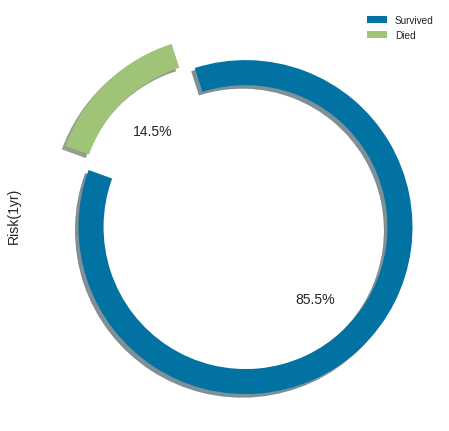

In [ ]:
figure = plt.figure(figsize = [12, 10])
space = np.ones(2)/10
data['Risk(1yr)'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''])
plt.legend(['Survived', 'Died'])
plt.ylabel('Risk(1yr)', size = 14)
plt.show()

**Observation:**

- Around **85% of patients survived** on post surgery after one year while around **15% of patients didn't survive**.

**<h4>Question 2: What is the performance of patients in zubrod scale with respect to survival?</h4>**

**Note:**
**Zubrod Scale**
- A rating scale measuring the ability of a cancer patient to carry out the activities of daily living. 
- **PRZ0:** (fully active, unrestricted by disease),
- **PRZ1:** (able to carry out light work), 
- **PRZ2:** (ambulatory but resting for as much as 50% of the day)

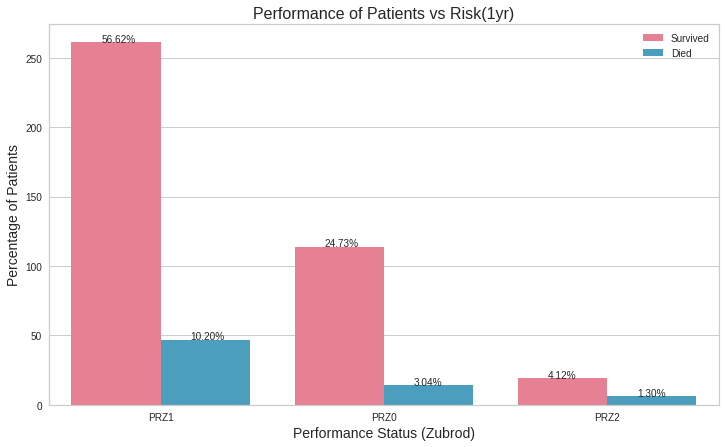

In [ ]:
figure = plt.figure(figsize = [12, 7])
ax = sns.countplot(x = 'ZubrodPerformanceStatus', hue = 'Risk(1yr)', data = data, palette = ['#F67088', '#38A7D0'])
total = data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Performance Status (Zubrod)', size = 14)
plt.ylabel('Percentage of Patients', size = 14)
plt.legend(labels = ['Survived', 'Died'])
plt.title('Performance of Patients vs Risk(1yr)', size = 16)
plt.show()

**Observation:**

- **Patients** who had **performance of PRZ1** type and **survived** are **approx 5X** more **than** the **patents who didn't**.
- **Patients** who had **performance of PRZ0** type and **survived** are **approx 12X** more **than** the **patients who didn't**.
- **Patients** who had **performance of PRZ2** type and **survived** are **approx 3X** more **than** the **patients who didn't**.

**<h4>Question 3: Is there any association between pain before surgery and survival risk?</h4>**

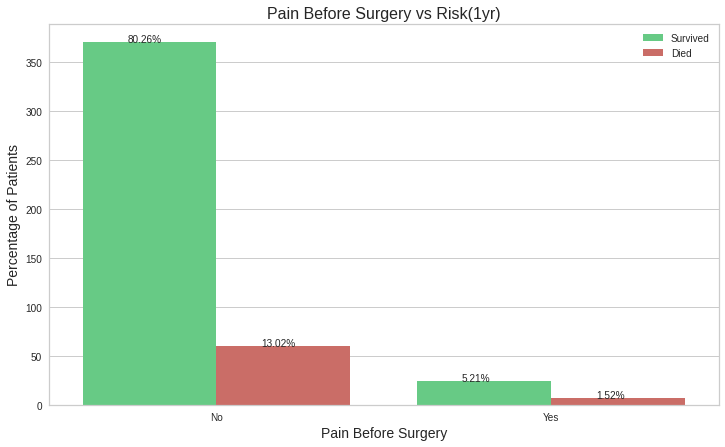

In [ ]:
figure = plt.figure(figsize = [12, 7])

ax = sns.countplot(x = 'PainBeforeSurgery', hue = 'Risk(1yr)', data = data, palette = ['#56DB7F', '#DB5E56'])
total = data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Pain Before Surgery', size = 14)
plt.ylabel('Percentage of Patients', size = 14)
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'], rotation = 0)
plt.legend(labels = ['Survived', 'Died'])
plt.title('Pain Before Surgery vs Risk(1yr)', size = 16)
plt.show()

**Observation:**

- **Patients** who **didn't have any pain before surgery** and **survived** are **approx 6X** more than the patients who didn't survive.
- **Patients** who **had pain before surgery** and **survived are approx 3X** more than the patients who didn't survive.

**<h4>Question 4: Is there any association between haemoptysis (cough with blood) before surgery and survival risk?</h4>**

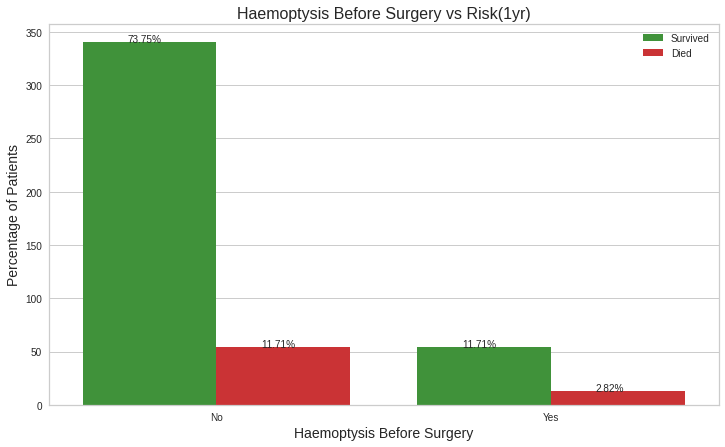

In [ ]:
figure = plt.figure(figsize = [12, 7])

ax = sns.countplot(x = 'HaemoptysisBeforeSurgery', hue = 'Risk(1yr)', data = data, palette = ['#33A02C', '#E31A1C'])
total = data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Haemoptysis Before Surgery', size = 14)
plt.ylabel('Percentage of Patients', size = 14)
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'], rotation = 0)
plt.legend(labels = ['Survived', 'Died'])
plt.title('Haemoptysis Before Surgery vs Risk(1yr)', size = 16)
plt.show()

**Observation:**

- **Patients** who **didn't have any haemoptysis before surgery** and **survived** are **approx 6X** more **than** the **patients who didn't**.
- **Patients** who **had haemoptysis before surgery** and **survived** are **approx 4X** more **than** the **patients who didn't**.

**<h4>Question 5: Is there any association between cough before surgery and survival risk?</h4>**

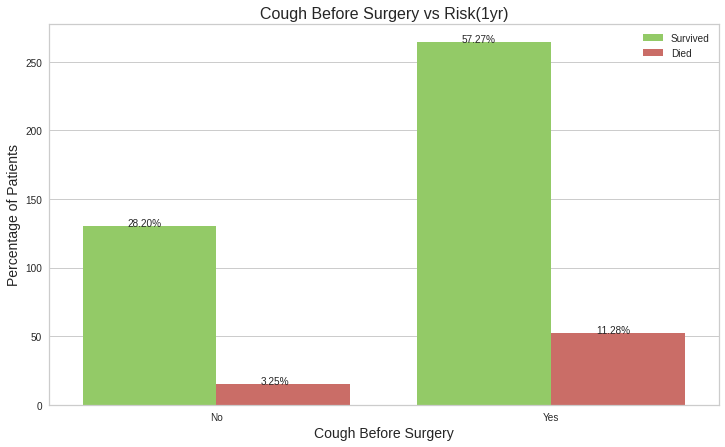

In [ ]:
figure = plt.figure(figsize = [12, 7])

ax = sns.countplot(x = 'CoughBeforeSurgery', hue = 'Risk(1yr)', data = data, palette = ['#91DB56', '#DB5E56'])
total = data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Cough Before Surgery', size = 14)
plt.ylabel('Percentage of Patients', size = 14)
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'], rotation = 0)
plt.legend(labels = ['Survived', 'Died'])
plt.title('Cough Before Surgery vs Risk(1yr)', size = 16)
plt.show()

**Observation:**

- **Patients** who **didn't have any cough before surgery** and **survived** are **approx 9X** more **than** the **patients who didn't**.
- **Patients** who **had cough before surgery** and **survived** are **approx 5X** more **than** the **patients who didn't**.

**<h4>Question 6: Is there any association between dyspnoea (difficult in breathing) before surgery and survival risk?</h4>**

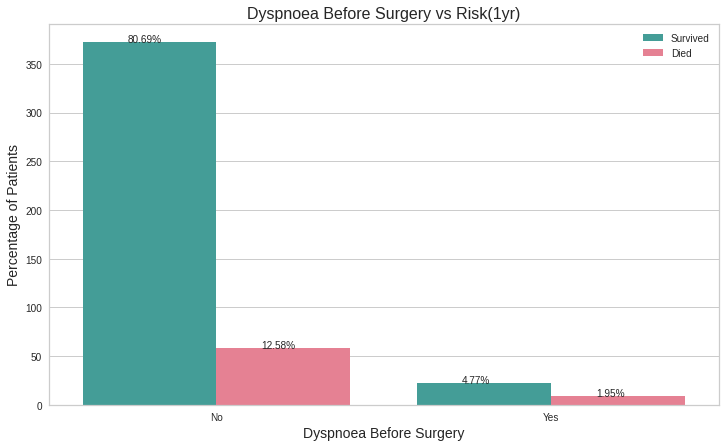

In [ ]:
figure = plt.figure(figsize = [12, 7])

ax = sns.countplot(x = 'DyspnoeaBeforeSurgery', hue = 'Risk(1yr)', data = data, palette = ['#35ACA4', '#F67088'])
total = data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Dyspnoea Before Surgery', size = 14)
plt.ylabel('Percentage of Patients', size = 14)
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'], rotation = 0)
plt.legend(labels = ['Survived', 'Died'])
plt.title('Dyspnoea Before Surgery vs Risk(1yr)', size = 16)
plt.show()

**Observation:**

- **Patients** who **didn't have any dyspnoea before surgery** and **survived** are **approx 6X more than** the **patients** who **didn't**.
- **Patients** who **had dyspnoea before surgery** and **survived** are **approx 2.5X more than** the **patients** who **didn't**.

**<h4>Question 7: Is there any association between weakness before surgery and survival risk?</h4>**

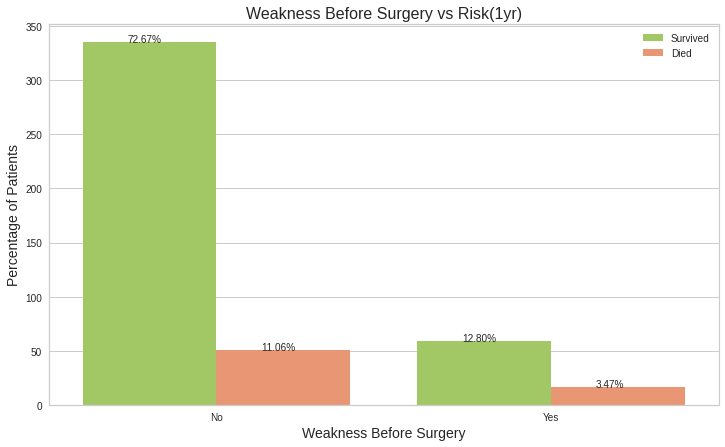

In [ ]:
figure = plt.figure(figsize = [12, 7])

ax = sns.countplot(x = 'WeaknessBeforeSurgery', hue = 'Risk(1yr)', data = data, palette = ['#A6D854', '#FC8D62'])
total = data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Weakness Before Surgery', size = 14)
plt.ylabel('Percentage of Patients', size = 14)
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'], rotation = 0)
plt.legend(labels = ['Survived', 'Died'])
plt.title('Weakness Before Surgery vs Risk(1yr)', size = 16)
plt.show()

**Observation:**

- **Patients** who **didn't had any weakness before surgery** and **survived** are **approx 6.5X more than** the **patients** who **didn't**.
- **Patients** who **had weakness before surgery** and **survived** are **approx 3.5X more than** the **patients** who **didn't**.

**<h4>Question 8: What is the proportion of survival with respect to each tumour size?</h4>**

**Note:** Size of the original tumour, from OC11 (smallest) to OC14 (largest) [OC11,OC14,OC12,OC13]

In [ ]:
oc11_data = data[data['OriginalTumourSize'] == 'OC11']
oc12_data = data[data['OriginalTumourSize'] == 'OC12']
oc13_data = data[data['OriginalTumourSize'] == 'OC13']
oc14_data = data[data['OriginalTumourSize'] == 'OC14']

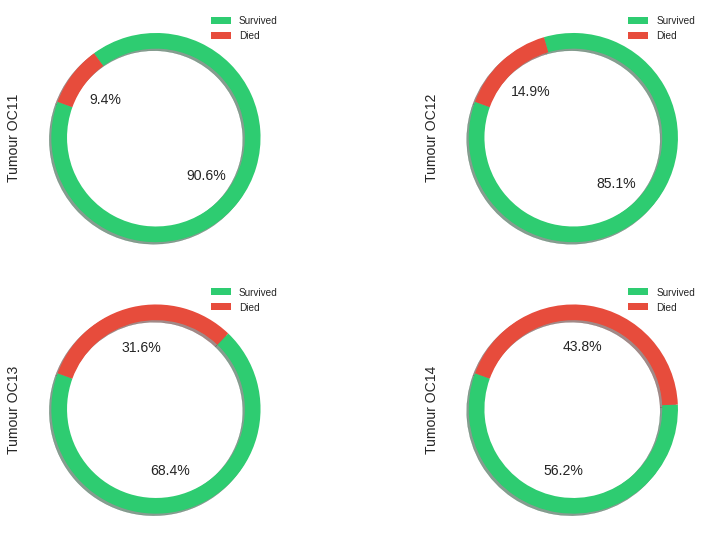

In [ ]:
figure = plt.figure(figsize = [40, 15])
plt.subplot(2, 2, 1)
oc11_data['Risk(1yr)'].value_counts().plot(kind = 'pie', fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''], colors = ['#2ECC71', '#E74C3C'])
plt.legend(['Survived', 'Died'])
plt.ylabel('Tumour OC11', size = 14)

plt.subplot(2, 2, 2)
oc12_data['Risk(1yr)'].value_counts().plot(kind = 'pie', fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''], colors = ['#2ECC71', '#E74C3C'])
plt.legend(['Survived', 'Died'])
plt.ylabel('Tumour OC12', size = 14)

plt.subplot(2, 2, 3)
oc13_data['Risk(1yr)'].value_counts().plot(kind = 'pie', fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''], colors = ['#2ECC71', '#E74C3C'])
plt.legend(['Survived', 'Died'])
plt.ylabel('Tumour OC13', size = 14)

plt.subplot(2, 2, 4)
oc14_data['Risk(1yr)'].value_counts().plot(kind = 'pie', fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width = 0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True, labels = ['', ''], colors = ['#2ECC71', '#E74C3C'])
plt.legend(['Survived', 'Died'])
plt.ylabel('Tumour OC14', size = 14)

plt.tight_layout(pad = 1.0)
plt.show()

**Observation:**

- **Patients** who had **tumour type OC11 & OC12 had higher chances of survival** than any other type of tumour type.

**<h4>Question 9: Is there any association between type 2 diabetes and survival risk?</h4>**

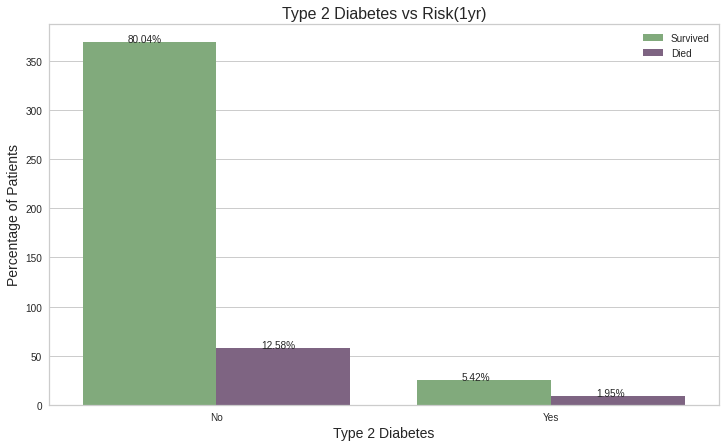

In [ ]:
figure = plt.figure(figsize = [12, 7])

ax = sns.countplot(x = 'Type2Diabetes', hue = 'Risk(1yr)', data = data, palette = ['#7BB274', '#825F87'])
total = data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Type 2 Diabetes', size = 14)
plt.ylabel('Percentage of Patients', size = 14)
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'], rotation = 0)
plt.legend(labels = ['Survived', 'Died'])
plt.title('Type 2 Diabetes vs Risk(1yr)', size = 16)
plt.show()

**Observation:**

- **Patients** who **didn't have any type 2 diabetes** and **survived** are **approx 6X more than** the **patients** who **didn't**.
- **Patients** who **had type 2 diabetes** and **survived** are **approx 2.5X more than** the **patients** who **didn't**.

**<h4>Question 10: What is the association of forced vital capacity at different age of the patients?</h4>**

- **Forced Vital Capacity:** Maximum amount of air a person can expel from the lungs after a maximum inhalation.

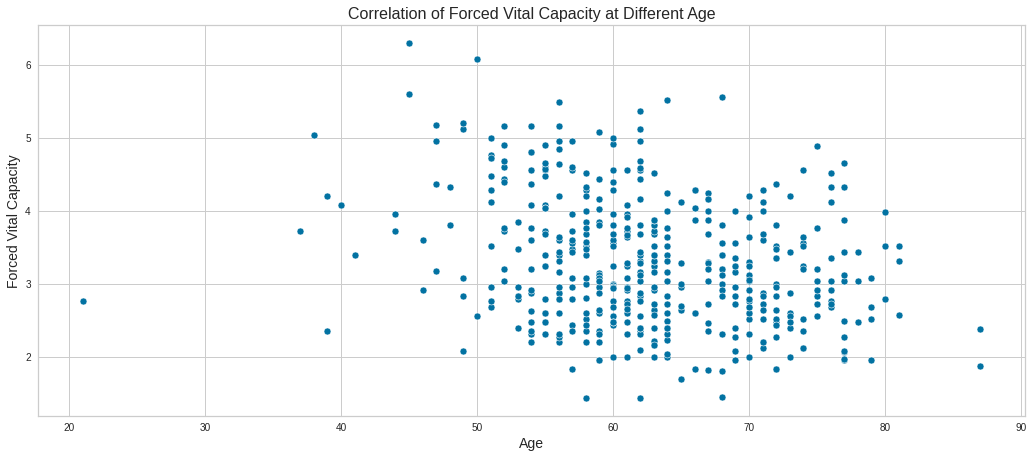

In [ ]:
figure = plt.figure(figsize = [15, 7])
sns.scatterplot(x = 'AgeAtSurgery', y = 'ForcedVitalCapacity', data = data, palette = ['#F67088', '#38A7D0'])
plt.xlabel('Age', size = 14)
plt.ylabel('Forced Vital Capacity', size = 14)
plt.title('Correlation of Forced Vital Capacity at Different Age', size = 16)
plt.tight_layout(pad = 3.0)
plt.show()

**Observation:**

- There is **no trend betwen age and forced vital capacity**.
- **Some patients** who have **age less than 70 have high forced vital capacity** than the patients above age 70.

<a id = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---

- In this part we will **perform encoding over categorical features** and **feed it** to the **Random Forest** because machines can't understand human language.
- **Random Forest** will then **identify important features** for our model **using threshold** over the information gain over reduction in impurity.
- And **finally** we will **split** our **data** for the **model development**.

<a id = Section71></a>
### **7.1 Encoding Categorical Features**


**Before Transformation**

In [ ]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,DiagnosisCode,ForcedVitalCapacity,ForcedExpirationVolume,ZubrodPerformanceStatus,PainBeforeSurgery,HaemoptysisBeforeSurgery,DyspnoeaBeforeSurgery,CoughBeforeSurgery,WeaknessBeforeSurgery,OriginalTumourSize,Type2Diabetes,MIUpto6,PeripheralArterialDiseases,Smoking,Asthma,AgeAtSurgery,Risk(1yr)
Type,object,float64,float64,object,object,bool,bool,object,bool,object,bool,bool,bool,bool,bool,int64,bool


**Observation**

- **Feature:**
  - Problem &rarr; Action Required {Reason}
- **DiagnosisCode**:
  - Object Data &rarr; Encoding {Machines cannot understand human language.}
- **ZubrodPerformanceStatus**
  - Object Data &rarr; Encoding {Machines cannot understand human language.}
- **OriginalTumourSize**
  - Object Data &rarr; Encoding {Machines cannot understand human language.}

**Performing Operations:**

In [ ]:
encoder = LabelEncoder()
data['DiagnosisCode'] = encoder.fit_transform(data['DiagnosisCode'])
data['ZubrodPerformanceStatus'] = encoder.fit_transform(data['ZubrodPerformanceStatus'])
data['OriginalTumourSize'] = encoder.fit_transform(data['OriginalTumourSize'])

**After Transformation**

In [ ]:
print('Data Shape:', data.shape)
data.head(5)

Data Shape: (461, 17)


,DiagnosisCode,ForcedVitalCapacity,ForcedExpirationVolume,ZubrodPerformanceStatus,PainBeforeSurgery,HaemoptysisBeforeSurgery,DyspnoeaBeforeSurgery,CoughBeforeSurgery,WeaknessBeforeSurgery,OriginalTumourSize,Type2Diabetes,MIUpto6,PeripheralArterialDiseases,Smoking,Asthma,AgeAtSurgery,Risk(1yr)
9,2,2.32,2.16,1,False,False,False,True,False,0,False,False,False,True,False,54,False
10,2,2.56,2.32,0,False,True,False,True,False,1,False,False,False,False,False,60,False
11,2,4.28,4.44,1,False,False,False,False,False,1,False,False,False,True,False,58,False
12,2,3.00,2.36,1,False,False,False,True,True,0,False,False,False,True,False,68,False
13,1,3.98,3.06,2,False,False,False,True,True,3,False,False,False,True,False,80,True


**Observation:**

- We have **successfully encoded our data** for furthere processing.

<a id = Section72></a>
### **7.2 Feature Scaling**

- Remember we have a feature whose distribution is right skewed (ForcedExpirationVolume).
- In this section we will study about that feature and perform operations.

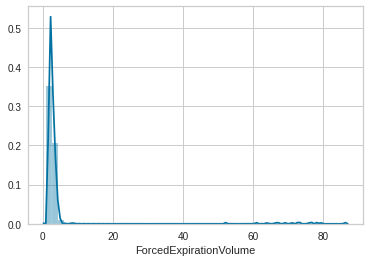

In [ ]:
sns.distplot(a = data['ForcedExpirationVolume'])
plt.show()

**Observation:**

- As you can see there are **some values** that are **affecting** the **distribution** of the **ForcedExpirationVolume** **feature**.
- We will **analyze** how many **values** are present there in **ForcedExpirationVolume** feature that is **affecting** the **distribution**.

In [ ]:
# Calculate IQR
Q3 = np.quantile(data['ForcedExpirationVolume'], 0.75)
Q1 = np.quantile(data['ForcedExpirationVolume'], 0.25)
IQR = Q3 - Q1

# Upper Outlier Limit
upper_limit = Q3 + 1.5 * IQR
print("Upper Limit for Outlier in 'ForcedExpirationVolume':", round(upper_limit, 1))

Upper Limit for Outlier in 'ForcedExpirationVolume': 4.8


In [ ]:
threshold = 5 # Choosing a threshold
print('Total Outliers:', data[data['ForcedExpirationVolume'] > threshold].shape[0])
prop = data[data['ForcedExpirationVolume'] > 5].shape[0] / data.shape[0]
print('Proportion of outlied values:', np.round(prop, decimals = 2)*100, '%')

Total Outliers: 16
Proportion of outlied values: 3.0 %


**Observation:**

- We can see that there are **16** such **values** that are **affecting** the **distribution** of the feature.
- We will **drop these points** as the **proportion** is **very less** i.e. 3%.
- Then we will **normalize ForcedExpirationVolume, AgeAtSurgery** using **log transformation**.
- After performing these operations will will analyze again.

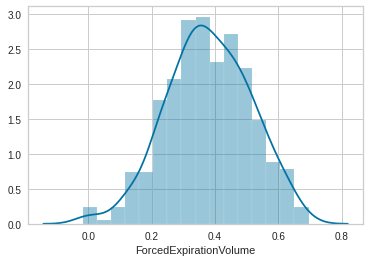

In [ ]:
# Dropping 16 outlied values
data = data[data['ForcedExpirationVolume'] <= 5]

# Normalizing ForcedExpirationVolume
data['ForcedExpirationVolume'] = np.log10(data['ForcedExpirationVolume'])

# Analyzing feature again
sns.distplot(a = data['ForcedExpirationVolume'])
plt.show()

<a id = Section73></a>
### **7.3 Feature Selection using Random Forest**

- Now in **real world**, it is very **rare** that **all** the **features** are **important** while developing the model. 
- So **instead** we **analyze** the **impact** of **input over the target**, either done by performing **statistical** **tests**(Pearson, ANOVA, Chi-Square) or by using **Random Forest**.
- This **interpretability** is **derived** from the **importance of each feature** on the tree decision **evaluated** on the **reduction** in **impurity**. 
- In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

In [ ]:
X = data.drop('Risk(1yr)', axis = 1)
y = data['Risk(1yr)']

**Extracting Important Feature**

In [ ]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 5
Threshold set by Model: 0.06
Features: ['DiagnosisCode', 'ForcedVitalCapacity', 'ForcedExpirationVolume', 'OriginalTumourSize', 'AgeAtSurgery']


**Visualization of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

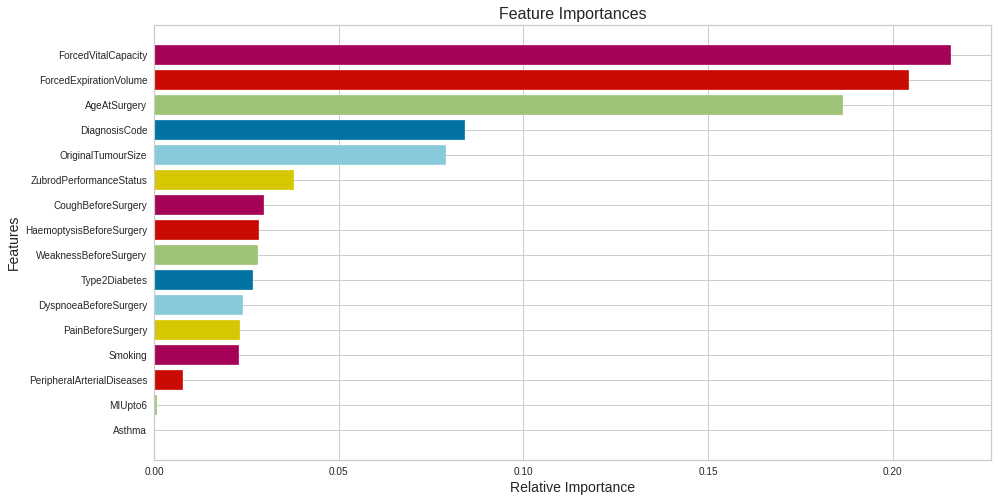

In [ ]:
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

**Observation:**

- We can see that **most of the features** are **showing importance except MIUpto6 and Asthma**.
- We will **use all features except these two** in our model building.

<a id = Section74></a>
### **7.4 Data Preparation**



In [ ]:
X = X.drop(['MIUpto6', 'Asthma'], axis = 1)

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (408, 14) (408,)
Testing Data Shape: (46, 14) (46,)


<a id = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop different models using only important features** as marked important by Random Forest.
- Then we will **compare the results** obtained from them and make our observation.
- For **evaluation purpose** we will plot **precision and recall** for **each** **estimator** for which have **made** a **custom function below**.
- **At the end** we will **tune** our **models if required**.

**Note:**

- As our **data is highly imbalanced**, a **common approach** of **discarding** the **minority class** data would be good **but** along with that our potential **information will** also get **lost**. 

- An **alternative** would be **oversampling the minority class** using SMOTE (**Synthetic Minority Oversampling Technique**) present in python library known as **imbalanced-learn**. 

<a id = Section81></a>
## **8.1 Baseline Models**

<a id = Section811></a>
### **8.1.1 Logistic Regression**

In [ ]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

y_train_pred_count = log.predict(X_train)
y_test_pred_count = log.predict(X_test)

y_train_pred_proba = log.predict_proba(X_train)
y_test_pred_proba = log.predict_proba(X_test)

In [ ]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       346
        True       0.67      0.03      0.06        62

    accuracy                           0.85       408
   macro avg       0.76      0.51      0.49       408
weighted avg       0.82      0.85      0.79       408

                    Testing Report           
              precision    recall  f1-score   support

       False       0.85      1.00      0.92        39
        True       0.00      0.00      0.00         7

    accuracy                           0.85        46
   macro avg       0.42      0.50      0.46        46
weighted avg       0.72      0.85      0.78        46



**Observation:**

- **Accuracy** for **training data** is **equal compared** to **testing data**.
- **Precision, Recall and f1-score** is **same** for **negative class** in both **training data and testing data**. But it is **not same for positive class**.

<a id = Section812></a>
### **8.1.2 Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)

In [ ]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       346
        True       1.00      1.00      1.00        62

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408

                    Testing Report           
              precision    recall  f1-score   support

       False       0.85      1.00      0.92        39
        True       0.00      0.00      0.00         7

    accuracy                           0.85        46
   macro avg       0.42      0.50      0.46        46
weighted avg       0.72      0.85      0.78        46



**Observation:**

- **Accuracy, Precision, Recall & f1-score** for **training data is high** as **compared to testing data** which is a **sign of overfitting**.
- The **Precision, Recall & f1-score for postive class is zero** for **positive class**. It is **due to** the **class imbalance problem**.
- To **overcome** this, **we will implement SMOTE in next section**.

<a id = Section82></a>
## **8.2 Oversampling Models**

#### **SMOTE Technique & its Implementation**

- SMOTE refers to **Synthetic Minority Oversampling Technique**.
- It **aims** to **balance class distribution** by **randomly** **increasing minority class** examples **by replicating** them. 
- It **synthesises** **new minority instances** **between** **existing** minority **instances**. 
- **It generates the virtual training records by linear interpolation for the minority class.** 

**Before Implimenting SMOTE**

In [ ]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (408, 14) (408,)
Testing Data Shape: (46, 14) (46,)


**Performing SMOTE Operation**

In [ ]:
# Have some patience, may take some time

sm = SMOTE(random_state = 42, ratio = 1)
X1, y1 = sm.fit_sample(X, y)

X_new = pd.DataFrame(data = X1, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size = 0.2, random_state = 42, stratify = y1)

**After Implimenting SMOTE**

In [ ]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (616, 14) (616,)
Testing Data Shape: (154, 14) (154,)


<a id = Section821></a>
### **8.2.1 Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)


In [ ]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       308
        True       1.00      1.00      1.00       308

    accuracy                           1.00       616
   macro avg       1.00      1.00      1.00       616
weighted avg       1.00      1.00      1.00       616

                    Testing Report           
              precision    recall  f1-score   support

       False       0.90      0.95      0.92        77
        True       0.95      0.90      0.92        77

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



**Observation:**

- **Accuracy** for **training data is high** as **compared to testing data** and **much better than previous models**.
- **Similar is the case with Precision and recall** for training data and testing data.
- But we can see **overfitting**. We want **generalize results** i.e. same results on test data as that of training data.
- In the **next section** we will **tune this model** because it outperformed Logisitic Regression.

<a id = Section83></a>
## **8.3 Fine Tuning of Model**

- In previous section we saw **Random Forest working better than rest of the models**. So we **will** **focus** on **fine tuning of Random Forest** in this section.
- **Tuning** the model **takes** **extensive work**, so we will be **working** out **with few parameters instead** of **large combinations**.
- Now that we know that **Random Forest performed better** **than any other model**, we **will fine tune** it.
- For that we will **implement Grid Search CV** to **find optimal setting** for the model.
- **Note:** **We want generalize results** i.e. approx. same precision and recall on test data as that of train data.

In [ ]:
parameter_grid = [{'n_estimators':[100, 200, 300, 400, 500], 
                   'criterion':['gini', 'entropy'], 
                   'max_depth' : [x for x in range(2, 12)], 
                   'bootstrap':[True, False]}]

In [ ]:
# Have some patience, may take some time :)
rfc = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = rfc, param_grid = parameter_grid, scoring = 'f1', n_jobs = -1, cv = 10, return_train_score = True)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 11, 'n_estimators': 300}

<a id = Section84></a>
## **8.4 Final Model**

In [ ]:
rfc = grid_search.best_estimator_
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)


In [ ]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       308
        True       0.99      0.99      0.99       308

    accuracy                           0.99       616
   macro avg       0.99      0.99      0.99       616
weighted avg       0.99      0.99      0.99       616

                    Testing Report           
              precision    recall  f1-score   support

       False       0.94      0.94      0.94        77
        True       0.94      0.94      0.94        77

    accuracy                           0.94       154
   macro avg       0.94      0.94      0.94       154
weighted avg       0.94      0.94      0.94       154



**Observation:**

- The **accuracy** of **training data** has **reduced** while for **testing data** it has **improved**.
- The **precision, recall and f1-score** for **training data and testing data** has **reached balanced** state.

<a id = Section9></a>

---
# **9. Conclusion**
---

- We **studied in depth about the data**, its **characteristics** and its **distribution**.

- We **explored various questions** **related** to the **health** of the patients and their **survival**.

- We **investigated in depth about the features** which to **retain** and which to **discard** (MIUpto6 and Asthma).

- Indeed we **peformed feature selection using Random Forest** because it is fast, accurate and reliable.
  
- We **performed model development** using **Logistic Regression and Random Forest**.

- Then at **final stage Random Forest outperformed the logisitc model** because of **low error**.

- Later **after tuning with some parameter combinations we finalized Random Forest** as our final model.

- Now this **model** will **help** us in **saving** not only a lot of **resources** (money, human resources etc.) but also help us in **abstaining** the **delay** in **identification** of **survival** of the patients.